<h1>Spotify Popular Songs Analysis</h1>

<img src="http://storage.googleapis.com/kaggle-datasets-images/2570056/4372070/fe6dd42ee550bd3dcd153e2f97dda840/dataset-cover.jpg" width="400"  style="float: left; margin-right: 15px; margin-bottom: 10px;" alt="(CSCA-5632)">


CSCA-5632: Unsupervised Learning Final Project<br/>
@author: Alexander Meau<br/>
@email: alme9155@colorado.edu
<hr/>

<h2>I. Project Description</h2>
<p>This is final project of CSCA-5632: Unsupervised Algorithms in Machine Learing.</p>
<p>Use techique of unsupervised learning to understand what features, such as danceability, energy, tempo, etc. will characterize a "hit" song.</p>

<h3>Objective:</h3>
<p>Use unsupervised learning to understand what features, such as danceability, energy, tempo, etc., characterize a "hit" song. While the definition of a popular "hit" song varies, this study will focus on characteristics that have reached the top 1% and 10% of popularity using the "Spotify Tracks" dataset.</p>

<h3>Type of Machine Learning Study:</h3>
Unsupervised learning (PCA + clustering to discover feature grouping
Target groups:
<ul>
    <li>Top 1% = Viral hits</li>
    <li>Top 10% = Popular songs</li>
</ul>
<h3>Dataset:</h3>
<p>Spotify Tracks Dataset from <a href="https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset">Kaggle</a>.</p>

<h3>Project Significance:</h3>
<p>Studying the Spotify Tracks dataset with unsupervised learning helps us gain deeper insights into what makes music resonate with listeners, independent of human bias or genre labels. Applying unsupervised learning methods (like clustering and dimensionality reduction) allows us to uncover hidden structures and natural groupings within the music landscape without relying on predefined labels.</p>
<ul>
<li>Identify Patterns:</li>
<p>Discover how musical attributes cluster together and what combinations tend to be associated with higher popularity.</p>
<li>Understand Hit Songs:</li>
<p>Reveal common characteristics shared by top-performing tracks versus less popular ones.</p>
<li>Support Future Prediction:</li>
<p>Provide a foundation for building supervised models to predict a song's potential popularity based on its features.</p>
</ul>


<h2>II. Dataset Description:</h2>
<p>Spotify Tracks Dataset from Kaggle (<a href="https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset">https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset</a>). The Spotify dataset contains over one million songs spanning 125 genres. Each entry includes the song's musical features and its popularity score.</p>

<h3>Number of features:</h3>

<style>
  table.dataframe {
    border-collapse: collapse;
    border: 1px solid #ccc;
    margin-bottom: 1em;
  }
  table.dataframe th, table.dataframe td {
    border: 1px solid #ccc;
    padding: 8px 12px;
    text-align: left;
    vertical-align: top;
  }
  table.dataframe th {
    background-color: #f2f2f2;
    font-weight: bold;
  }
</style>

<table class="dataframe">
  <thead>
    <tr>
      <th>Column</th>
      <th>Column Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>track_id</td>
      <td>The Spotify ID for the track</td>
    </tr>
    <tr>
      <td>artists</td>
      <td>The artists' names who performed the track. If there is more than one artist, they are separated by a ;</td>
    </tr>
    <tr>
      <td>album_name</td>
      <td>The album name in which the track appears</td>
    </tr>
    <tr>
      <td>track_name</td>
      <td>Name of the track</td>
    </tr>
    <tr>
      <td>popularity</td>
      <td>The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>The track length in milliseconds</td>
    </tr>
    <tr>
      <td>explicit</td>
      <td>Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)</td>
    </tr>
    <tr>
      <td>danceability</td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable</td>
    </tr>
    <tr>
      <td>energy</td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale</td>
    </tr>
    <tr>
      <td>key</td>
      <td>The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1</td>
    </tr>
    <tr>
      <td>loudness</td>
      <td>The overall loudness of a track in decibels (dB)</td>
    </tr>
    <tr>
      <td>mode</td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0</td>
    </tr>
    <tr>
      <td>speechiness</td>
      <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks</td>
    </tr>
    <tr>
      <td>acousticness</td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic</td>
    </tr>
    <tr>
      <td>instrumentalness</td>
      <td>Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content</td>
    </tr>
    <tr>
      <td>liveness</td>
      <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live</td>
    </tr>
    <tr>
      <td>valence</td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)</td>
    </tr>
    <tr>
      <td>tempo</td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration</td>
    </tr>
    <tr>
      <td>time_signature</td>
      <td>An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.</td>
    </tr>
    <tr>
      <td>track_genre</td>
      <td>The genre in which the track belongs</td>
    </tr>
  </tbody>
</table>


<h2>III. Exploratory Data Analysis</h2>

<h3>III.i.Loading the data from Kaggle</h3>
This notebook require internet connection to access dataset from the kaggle dataset.

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## loading the data
data = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')
data = data.drop("Unnamed: 0", axis=1)

print(f"Data loaded successfully.")

/kaggle/input/-spotify-tracks-dataset/dataset.csv
Data loaded successfully.


<h3>III.ii.Exploring and understanding the data</h3>
Perform a thorough exploratory data analysis (EDA) using appropriate visualizations, and then summarize the key findings to formulate project strategy.

In [32]:
# EDA process
# 1. load the dataset
# 2. inspect the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# drop row-id column "Unnamed: 0"

print(f"\nDataSet Info:")
print("--------------------------")
print(data.info())
print(f"\nDataSet Shape:")
print("--------------------------")
print(f"Data Shape: {data.shape[0]} Rows x {data.shape[1]} Columns")
# print(data.shape)

print(f"\nFirst five rows of training data:")
print("--------------------------") 
df_head = data.head(5)
display(df_head)

print(f"\nNaN values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nNull values in non-numeric columns:")
print("--------------------------")    
print(data.select_dtypes(include='object').columns.isnull().sum())

numeric_columns = data.select_dtypes(exclude='object').columns
zero_counts = (data[numeric_columns] == 0).sum().sort_values(ascending=False)
print("\nNumber of zeros in each numeric column:")
print("----------------------------------------")
df_zeros = pd.DataFrame({
    'Column Name': zero_counts.index,
    'Number of Zeros': zero_counts.values
})
df_zeros['% of Zeros Rows'] = ((df_zeros['Number of Zeros'] / data.shape[0]) * 100).round(2).astype(str)+"%"
display(df_zeros)


DataSet Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 n

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,hit_label,category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,2,Top 10% Popular
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0,All Songs
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0,All Songs
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,2,Top 10% Popular
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1,Top 1% Viral



NaN values in dataset:
--------------------------
NaN values in dataset:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
hit_label           0
category            0
dtype: int64

Null values in non-numeric columns:
--------------------------
0

Number of zeros in each numeric column:
----------------------------------------


,Column Name,Number of Zeros,% of Zeros Rows
0,explicit,104253,91.45%
1,hit_label,102600,90.0%
2,mode,41319,36.24%
3,instrumentalness,38763,34.0%
4,popularity,16020,14.05%
5,key,13061,11.46%
6,valence,176,0.15%
7,time_signature,163,0.14%
8,danceability,157,0.14%
9,speechiness,157,0.14%



Popularity
--------------------------
Number of popularity:101
Popularity ranges: range(0,100)


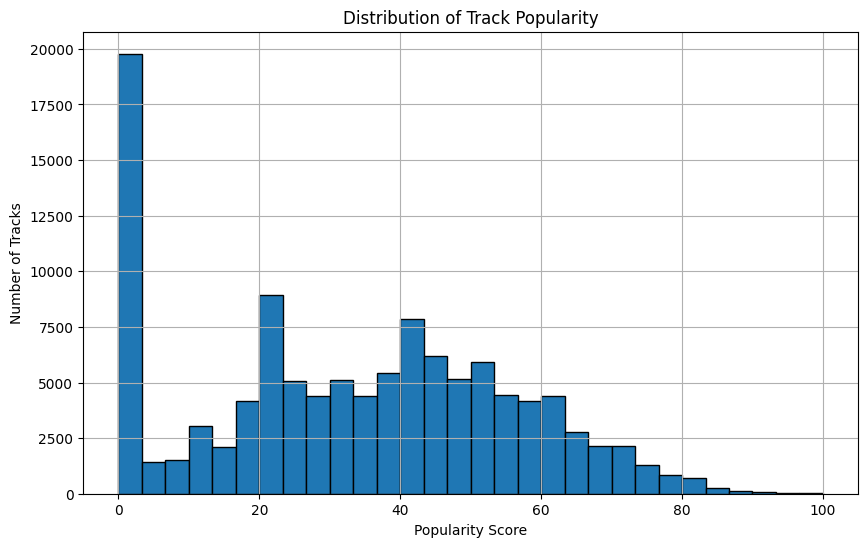

In [29]:
import matplotlib.pyplot as plt

print("\nPopularity")
print("--------------------------")    
unique_popularity_values = data['popularity'].unique()
print(f"Number of popularity:{len(unique_popularity_values)}")
print(f"Popularity ranges: range({data['popularity'].min()},{data['popularity'].max()})")

# Basic histogram
plt.figure(figsize=(10,6))
plt.hist(data['popularity'], bins=30, edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

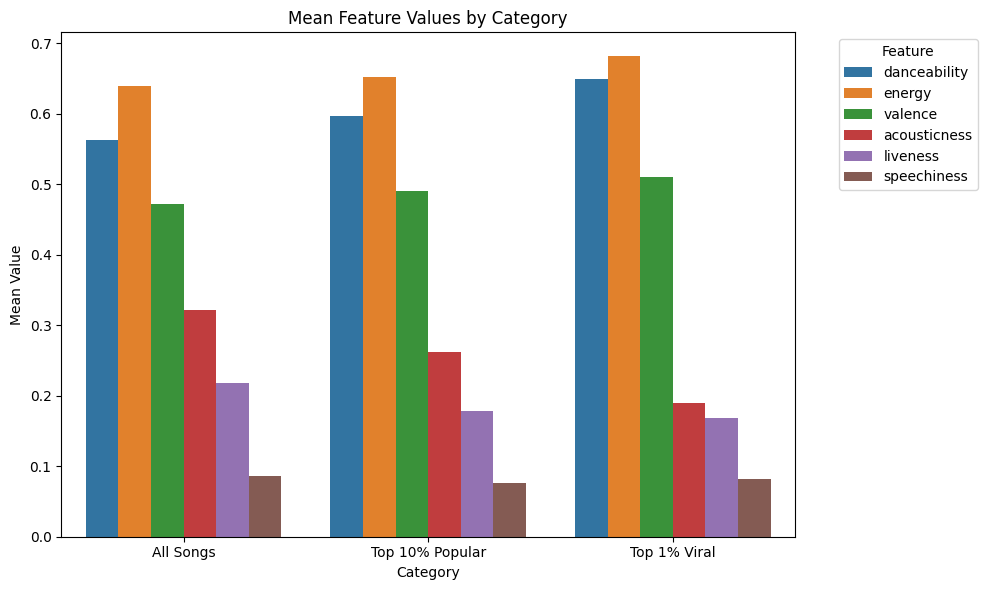

In [61]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness']
data = data.dropna(subset=features)
df_sorted = data.sort_values(by='popularity', ascending=False)
top_1_percent = int(len(data) * 0.01)
top_10_percent = int(len(data) * 0.10)

viral_songs = df_sorted.iloc[:top_1_percent]
popular_songs = df_sorted.iloc[:top_10_percent]

data['hit_label'] = 0
data.loc[data.index.isin(popular_songs.index), 'hit_label'] = 2
data.loc[data.index.isin(viral_songs.index), 'hit_label'] = 1
data['category'] = 'All Songs'
data.loc[data['hit_label'] == 2, 'category'] = 'Top 10% Popular'
data.loc[data['hit_label'] == 1, 'category'] = 'Top 1% Viral'

# Calculate mean feature values for each category
mean_values = data.groupby('category')[features].mean().reset_index()

# Melt the DataFrame for easier plotting
mean_values_melted = mean_values.melt(id_vars='category', var_name='Feature', value_name='Mean Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='Mean Value', hue='Feature', data=mean_values_melted,
            order=['All Songs', 'Top 10% Popular', 'Top 1% Viral'])
plt.title('Mean Feature Values by Category')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

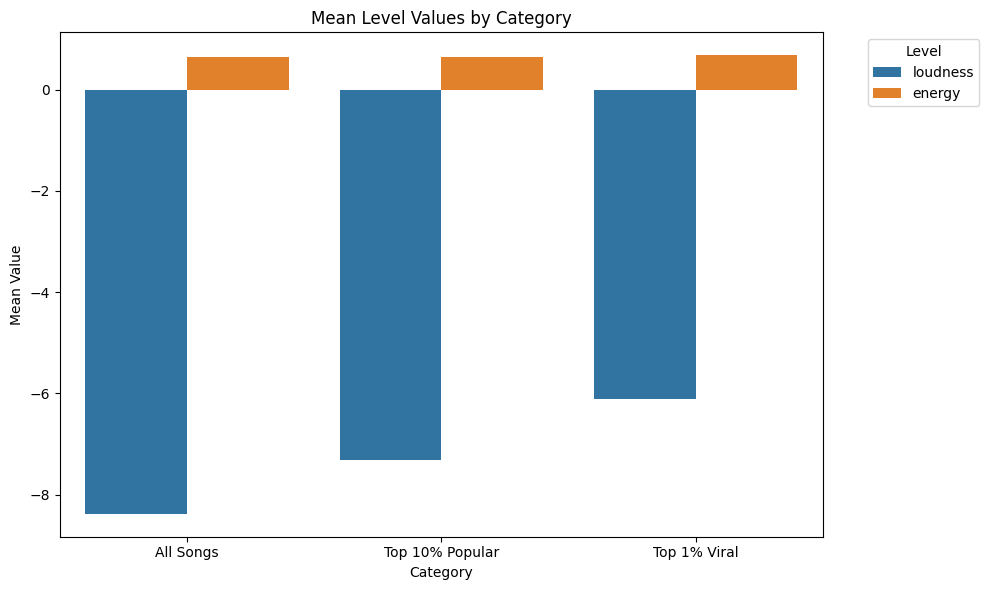

In [62]:

sound_level = ['loudness', 'energy']
data = data.dropna(subset=sound_level)
df_sorted = data.sort_values(by='popularity', ascending=False)
top_1_percent = int(len(data) * 0.01)
top_10_percent = int(len(data) * 0.10)
viral_songs = df_sorted.iloc[:top_1_percent]
popular_songs = df_sorted.iloc[:top_10_percent]
data['hit_label'] = 0
data.loc[data.index.isin(popular_songs.index), 'hit_label'] = 2
data.loc[data.index.isin(viral_songs.index), 'hit_label'] = 1
data['category'] = 'All Songs'
data.loc[data['hit_label'] == 2, 'category'] = 'Top 10% Popular'
data.loc[data['hit_label'] == 1, 'category'] = 'Top 1% Viral'

mean_values = data.groupby('category')[sound_level].mean().reset_index()
mean_values_melted = mean_values.melt(id_vars='category', var_name='Level', value_name='Mean Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='Mean Value', hue='Level', data=mean_values_melted,
            order=['All Songs', 'Top 10% Popular', 'Top 1% Viral'])
plt.title('Mean Level Values by Category')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h3>EDA summary</h3>
<p>This dataset has 114,800 rows and 22 columns</p>
<p>The dataset typically includes features like:</p>

 <ul>
  <li><strong>Track metadata:</strong> track_name, artists, album_name, track_id</li>
  
  <li><strong>Audio features:</strong> 
    danceability, energy, key, loudness, mode
    speechiness, acousticness, instrumentalness, liveness
    valence,tempo, duration_ms
  </li>
  
  <li><strong>Popularity:</strong> 
    popularity (a score from 0 to 100, where higher values indicate more popular tracks).
  </li>
  
  <li><strong>Genre:</strong> track_genre</li>
</ul>

* There are no missing values (NaN) in numeric values columns, such as "popularity", "energy", etc.
* Confirmed with the skewed distribution in histogram, "Popularity" has 16,020 rows with zero values.

<h3>Analysis and Strategy</h3>

* Even though there are over 100,000 tracks on spotify platform, most songs has 0 popularity score.
* Having large volume of non-popular songs increase challenge of unsupervised learning, as clusters might be dominated by non-hit songs
* By analyzing the the top 1% (viral songs), top 10% (popular songs):
* There are number of features has positive relationship that contributes the popularity of the songs.
* The unscaled bar plot was misleading due to scale different. We might need to scale the data before modeling.
* Need to focus on high-impact features, such as danceability, energy, valence for clustering and modeling. 

<h3>EDA Analysis</h3>

* This dataset has 114,800 rows and 22 columns
EDA Summary, findings, dicussing foresen difficulties and analysis strategy

<h3>III.iii. Visualation</h3>

In [ ]:
EDA Summary, findings, dicussing foresen difficulties and analysis strategy

<h2>IV. Data Cleaning and Pre-processing</h2>

<h3>Prepare data for unsupervised learning</h3>


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Replace inf values with NaN and handle missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']
sound_level = ['liveness', 'loudness', 'speechiness', 'tempo']

# DataSet Info:
# --------------------------
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 114000 entries, 0 to 113999
# Data columns (total 22 columns):
#  #   Column            Non-Null Count   Dtype  
# ---  ------            --------------   -----  
#  0   track_id          114000 non-null  object 
#  1   artists           113999 non-null  object 
#  2   album_name        113999 non-null  object 
#  3   track_name        113999 non-null  object 
#  4   popularity        114000 non-null  int64  
#  5   duration_ms       114000 non-null  int64  
#  6   explicit          114000 non-null  bool   
#  7   danceability      114000 non-null  float64
#  8   energy            114000 non-null  float64
#  9   key               114000 non-null  int64  
#  10  loudness          114000 non-null  float64
#  11  mode              114000 non-null  int64  
#  12  speechiness       114000 non-null  float64
#  13  acousticness      114000 non-null  float64
#  14  instrumentalness  114000 non-null  float64
#  15  liveness          114000 non-null  float64
#  16  valence           114000 non-null  float64
#  17  tempo             114000 non-null  float64
#  18  time_signature    114000 non-null  int64  
#  19  track_genre       114000 non-null  object 
#  20  hit_label         114000 non-null  int64  
#  21  category          114000 non-null  object 

data = data.dropna(subset=features)

# Define hit labels
df_sorted = data.sort_values(by='popularity', ascending=False)
top_1_percent = int(len(data) * 0.01)
top_10_percent = int(len(data) * 0.10)
viral_songs = df_sorted.iloc[:top_1_percent]
popular_songs = df_sorted.iloc[:top_10_percent]
data['hit_label'] = 0
data.loc[data.index.isin(popular_songs.index), 'hit_label'] = 2
data.loc[data.index.isin(viral_songs.index), 'hit_label'] = 1
data['category'] = 'All Songs'
data.loc[data['hit_label'] == 2, 'category'] = 'Top 10% Popular'
data.loc[data['hit_label'] == 1, 'category'] = 'Top 1% Viral'

In [42]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'loudness']
sound_level = ['liveness', 'loudness', 'speechiness', 'tempo']
all_features = list(set(features + sound_level))  # Combine features for cleaning
data = data.dropna(subset=all_features)
df_sorted = data.sort_values(by='popularity', ascending=False)
top_1_percent = int(len(data) * 0.01)
top_10_percent = int(len(data) * 0.10)
viral_songs = df_sorted.iloc[:top_1_percent]
popular_songs = df_sorted.iloc[:top_10_percent]
data['hit_label'] = 0
data.loc[data.index.isin(popular_songs.index), 'hit_label'] = 2
data.loc[data.index.isin(viral_songs.index), 'hit_label'] = 1
data['category'] = 'All Songs'
data.loc[data['hit_label'] == 2, 'category'] = 'Top 10% Popular'
data.loc[data['hit_label'] == 1, 'category'] = 'Top 1% Viral'

ValueError: Could not interpret input 'Feature'

<Figure size 1000x600 with 0 Axes>

In [ ]:
x_train, x_validate, y_train, y_validate = \
    train_test_split(x_train_tfidf, y_train, test_size=0.2, random_state=42)
train = 
test = pd.read_csv('/kaggle/input/learn-ai-bbc/BBC News Test.csv')